In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
df = pd.read_pickle('./dataset/FIFA가중치.pkl')
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25
0,73450,158023,L. Messi,31,Argentina,94,86.954721,FC Barcelona,14365000.0,2202,Left,5.0,4.0,1,RF,"Jul 1, 2004",0,2021,86.873762,82.851709,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500,1.375,1.78,1.38,1.13,3,1.0,85.634056,2.298240,2.090291,1.988824,1.622995
1,54600,177003,L. Modrić,32,Croatia,91,82.058462,Real Madrid,8710000.0,2280,Right,4.0,4.0,1,RCM,"Aug 1, 2012",0,2020,81.313155,72.292139,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.695693,2.237408,2.122623,1.991895,1.654479
2,49400,155862,Sergio Ramos,32,Spain,91,82.058462,Real Madrid,6630000.0,2201,Right,4.0,3.0,1,RCB,"Aug 1, 2005",0,2020,75.752549,70.532211,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,1,1.0,75.937128,2.237408,2.122623,1.991895,1.654479
3,46150,173731,G. Bale,28,Wales,88,77.162203,Real Madrid,7800000.0,2279,Left,4.0,3.0,1,ST,"Sep 2, 2013",0,2022,75.752549,74.052067,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.13,3,1.0,75.626265,2.237408,2.122623,1.991895,1.654479
4,46150,182521,T. Kroos,28,Germany,90,80.426376,Real Madrid,9945000.0,2190,Right,4.0,5.0,1,LCM,"Jul 17, 2014",0,2022,80.201034,73.172103,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.058783,2.237408,2.122623,1.991895,1.654479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,39.624220,Atlético Huila,61750.0,1759,Left,1.0,3.0,0,LB,"Aug 7, 2018",0,2023,51.285881,44.133285,83330.0,11.030865,4.5,Defender,48.751973,146.250000,49.921318,130.0,48.751973,130.0,48.751973,1.292,1.00,1.00,1.07,1,1.0,45.666404,1.141394,1.000000,1.000000,1.000000
14320,130,228457,A. Dabasse,24,France,61,36.360048,Chamois Niortais Football Club,42250.0,1463,Left,1.0,3.0,0,ST,"Jul 1, 2015",0,2019,35.716183,49.413071,77090.0,10.651383,4.5,Foward,48.751973,198.421053,52.954184,130.0,48.751973,130.0,48.751973,1.229,1.00,1.00,1.13,3,1.0,40.203927,1.224301,1.141394,1.000000,1.000000
14321,130,242534,C. Cásseres Jr,18,Venezuela,61,60.841341,New York Red Bulls,68250.0,1633,Right,1.0,3.0,0,CM,"Feb 2, 2018",0,2020,40.164668,53.812891,143000.0,11.130947,3.0,Medfielder,48.751973,429.000000,60.637852,260.0,55.645204,130.0,48.751973,1.000,1.00,1.00,1.07,2,1.0,50.431743,1.425160,1.366217,1.141394,1.000000
14322,130,236955,P. Tomczyk,20,Poland,58,37.992134,Lech Poznań,23400.0,1355,Right,1.0,2.0,0,ST,"Dec 17, 2016",0,2021,33.491940,35.333644,36270.0,10.060534,2.0,Foward,48.751973,448.500000,61.081359,390.0,59.687076,130.0,48.751973,1.146,1.00,1.00,1.13,3,1.0,35.372035,1.449298,1.283179,1.224301,1.000000


<Figure size 1440x360 with 0 Axes>

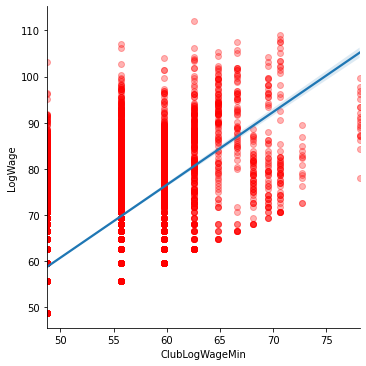

In [3]:
fig = plt.figure(figsize=(20,5))

sns.lmplot(data=df, x='ClubLogWageMin', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [4]:
df.columns

Index(['Wage', 'ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Special', 'PreferredFoot', 'InternationalReputation',
       'WeakFoot', 'RealFace', 'Position', 'Joined', 'LoanedFrom',
       'ContractValidUntil', 'Reactions', 'Composure', 'ReleaseClause',
       'LogValue', 'Foot', 'PositionClass', 'LogWage', 'ClubWageMean',
       'ClubLogWageMean', 'ClubWageMedian', 'ClubLogWageMedian', 'ClubWageMin',
       'ClubLogWageMin', 'AgeWeight', 'InternationalReputationWeight',
       'RealFaceWeight', 'PositionClassWeight', 'PositionClass1',
       'LoanedFromWeight', 'Total', 'ClubWeight100', 'ClubWeight75',
       'ClubWeight50', 'ClubWeight25'],
      dtype='object')

<AxesSubplot:>

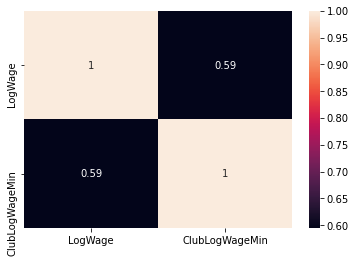

In [5]:
sns.heatmap(df[['LogWage', 'ClubLogWageMin']].corr(), annot=True)

<AxesSubplot:>

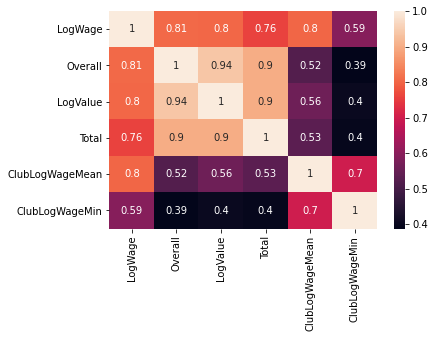

In [6]:
# 능력치 컬럼들 확인

sns.heatmap(df[['LogWage', 'Overall', 'LogValue', 'Total', 'ClubLogWageMean', 
                'ClubLogWageMin']].corr(), annot=True)

# PredictLogWage 컬럼 생성

# ClubLogWageMin에 가중치들을 곱한 뒤

# 공식에 넣어 계산하겠다.

In [7]:
df['PredictLogWage'] = 1

# ClubWeight25, 50은 하위 값들에게 악영향을 미친다고 그래프를 보고 판단하여 뺌.

공식

2*(ClubWeight100-1) 
*(AgeWeight * InternationalReputationWeight * RealFaceWeigh
*PositionClassWeight * LoanedFromWeight * ClubWeight75 * ClubLogWageMin)
+LogWage.min()

In [8]:
for i in range(df.shape[0]):
    df.PredictLogWage[i] = 2*(df.ClubWeight100[i]-1)* \
    (df.AgeWeight[i]*df.InternationalReputationWeight[i]* \
    df.RealFaceWeight[i]*df.PositionClassWeight[i]*df.LoanedFromWeight[i]* \
    df.ClubWeight75[i]*df.ClubLogWageMin[i])+df.LogWage.min()

<Figure size 1440x360 with 0 Axes>

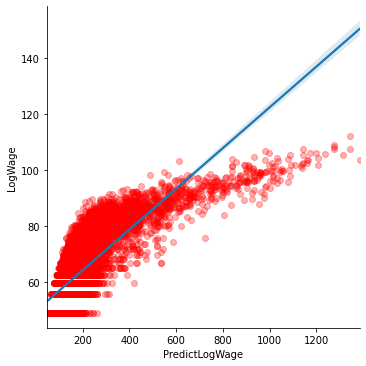

In [9]:
fig = plt.figure(figsize=(20,5))

sns.lmplot(data=df, x='PredictLogWage', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

<AxesSubplot:>

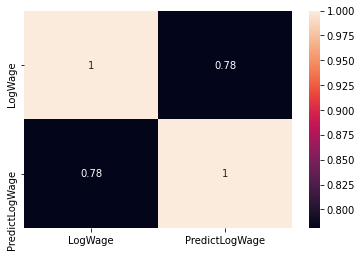

In [10]:
sns.heatmap(df[['LogWage','PredictLogWage']].corr(), annot=True)

<AxesSubplot:>

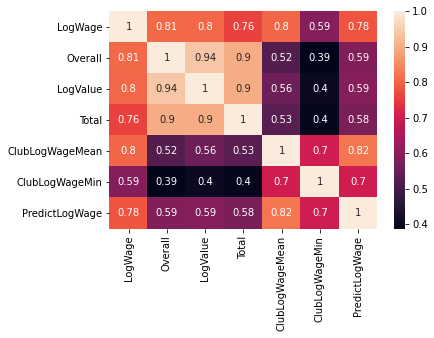

In [11]:
# LogWage와의 선형성이 증가했다.

sns.heatmap(df[['LogWage', 'Overall', 'LogValue', 'Total', 'ClubLogWageMean', 
                'ClubLogWageMin','PredictLogWage']].corr(), annot=True)

# PredictLogWage 컬럼에 ClubWeight 곡선의 

# 기울기를 적용한 PredictLogWage1 컬럼 생성

# -20은 내가 그래프를 보고 선택한 값이다.

In [12]:
df['PredictLogWage1'] = df.PredictLogWage
df['PredictLogWage1']

0        1344
1        1276
2        1276
3        1344
4        1276
         ... 
14319      67
14320      83
14321     109
14322     121
14323     112
Name: PredictLogWage1, Length: 14324, dtype: int64

In [13]:
# 선수 한 명씩 추출
for i in range(df.shape[0]):
    
    
    # (팀 최대LogWage/전체 축구선수 최저 LogWage)가 1이고
    if df.ClubWeight100[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 100%(전체)에 속하면 능력치를 -20으로 만든다. 
        if df.PredictLogWage[i]<=df[df.Club==df.Club[i]].PredictLogWage.describe()[7]:
            df.PredictLogWage1[i] = -20
    
    
    # (팀 하위 75% 선수의 LogWage/전체 축구선수 최저 LogWage)가 1이고       
    if df.ClubWeight75[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 75%에 속하면 능력치를 -20으로 만든다. 
        if df.PredictLogWage[i]<=df[df.Club==df.Club[i]].PredictLogWage.describe()[6]:
            df.PredictLogWage1[i] = -20
    
    
    # (팀 하위 50% 선수의 LogWage/전체 축구선수 최저 LogWage)가 1이고  
    if df.ClubWeight50[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 50%에 속하면 능력치를 -20으로 만든다. 
        if df.PredictLogWage[i]<=df[df.Club==df.Club[i]].PredictLogWage.describe()[5]:
            df.PredictLogWage1[i] = -20
    
    
    ## (팀 하위 25% 선수의 LogWage/전체 축구선수 최저 LogWage)가 1이고  
    if df.ClubWeight25[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 25%에 속하면 능력치를 -20으로 만든다.
        if df.PredictLogWage[i]<=df[df.Club==df.Club[i]].PredictLogWage.describe()[4]:
            df.PredictLogWage1[i] = -20
    
df

,Wage,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,PreferredFoot,InternationalReputation,WeakFoot,RealFace,Position,Joined,LoanedFrom,ContractValidUntil,Reactions,Composure,ReleaseClause,LogValue,Foot,PositionClass,LogWage,ClubWageMean,ClubLogWageMean,ClubWageMedian,ClubLogWageMedian,ClubWageMin,ClubLogWageMin,AgeWeight,InternationalReputationWeight,RealFaceWeight,PositionClassWeight,PositionClass1,LoanedFromWeight,Total,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,PredictLogWage,PredictLogWage1
0,73450,158023,L. Messi,31,Argentina,94,86.954721,FC Barcelona,14365000.0,2202,Left,5.0,4.0,1,RF,"Jul 1, 2004",0,2021,86.873762,82.851709,29445000.0,16.480305,5.5,Foward,112.043738,17654.000000,97.787743,16250.0,96.959097,520.0,62.557500,1.375,1.78,1.38,1.13,3,1.0,85.634056,2.298240,2.090291,1.988824,1.622995,1344,1344
1,54600,177003,L. Modrić,32,Croatia,91,82.058462,Real Madrid,8710000.0,2280,Right,4.0,4.0,1,RCM,"Aug 1, 2012",0,2020,81.313155,72.292139,17862000.0,15.979982,4.0,Medfielder,109.078075,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.695693,2.237408,2.122623,1.991895,1.654479,1276,1276
2,49400,155862,Sergio Ramos,32,Spain,91,82.058462,Real Madrid,6630000.0,2201,Right,4.0,3.0,1,RCB,"Aug 1, 2005",0,2020,75.752549,70.532211,13598000.0,15.707116,3.0,Defender,108.077259,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,1,1.0,75.937128,2.237408,2.122623,1.991895,1.654479,1276,1276
3,46150,173731,G. Bale,28,Wales,88,77.162203,Real Madrid,7800000.0,2279,Left,4.0,3.0,1,ST,"Sep 2, 2013",0,2022,75.752549,74.052067,15990000.0,15.869634,4.5,Foward,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.13,3,1.0,75.626265,2.237408,2.122623,1.991895,1.654479,1344,1344
4,46150,182521,T. Kroos,28,Germany,90,80.426376,Real Madrid,9945000.0,2190,Right,4.0,5.0,1,LCM,"Jul 17, 2014",0,2022,80.201034,73.172103,20384000.0,16.112581,5.0,Medfielder,107.396739,20335.000000,99.201480,16575.0,97.157111,1170.0,70.656134,1.333,1.68,1.38,1.07,2,1.0,78.058783,2.237408,2.122623,1.991895,1.654479,1276,1276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,130,221381,L. Tipton,25,Colombia,65,39.624220,Atlético Huila,61750.0,1759,Left,1.0,3.0,0,LB,"Aug 7, 2018",0,2023,51.285881,44.133285,83330.0,11.030865,4.5,Defender,48.751973,146.250000,49.921318,130.0,48.751973,130.0,48.751973,1.292,1.00,1.00,1.07,1,1.0,45.666404,1.141394,1.000000,1.000000,1.000000,67,-20
14320,130,228457,A. Dabasse,24,France,61,36.360048,Chamois Niortais Football Club,42250.0,1463,Left,1.0,3.0,0,ST,"Jul 1, 2015",0,2019,35.716183,49.413071,77090.0,10.651383,4.5,Foward,48.751973,198.421053,52.954184,130.0,48.751973,130.0,48.751973,1.229,1.00,1.00,1.13,3,1.0,40.203927,1.224301,1.141394,1.000000,1.000000,83,83
14321,130,242534,C. Cásseres Jr,18,Venezuela,61,60.841341,New York Red Bulls,68250.0,1633,Right,1.0,3.0,0,CM,"Feb 2, 2018",0,2020,40.164668,53.812891,143000.0,11.130947,3.0,Medfielder,48.751973,429.000000,60.637852,260.0,55.645204,130.0,48.751973,1.000,1.00,1.00,1.07,2,1.0,50.431743,1.425160,1.366217,1.141394,1.000000,109,-20
14322,130,236955,P. Tomczyk,20,Poland,58,37.992134,Lech Poznań,23400.0,1355,Right,1.0,2.0,0,ST,"Dec 17, 2016",0,2021,33.491940,35.333644,36270.0,10.060534,2.0,Foward,48.751973,448.500000,61.081359,390.0,59.687076,130.0,48.751973,1.146,1.00,1.00,1.13,3,1.0,35.372035,1.449298,1.283179,1.224301,1.000000,121,-20


<Figure size 1440x1440 with 0 Axes>

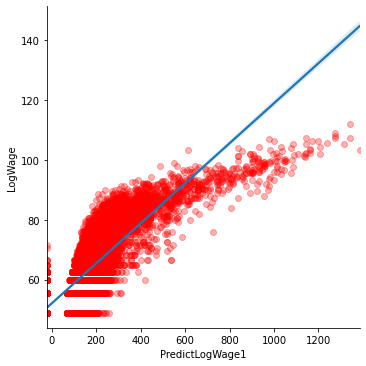

In [14]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='PredictLogWage1', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

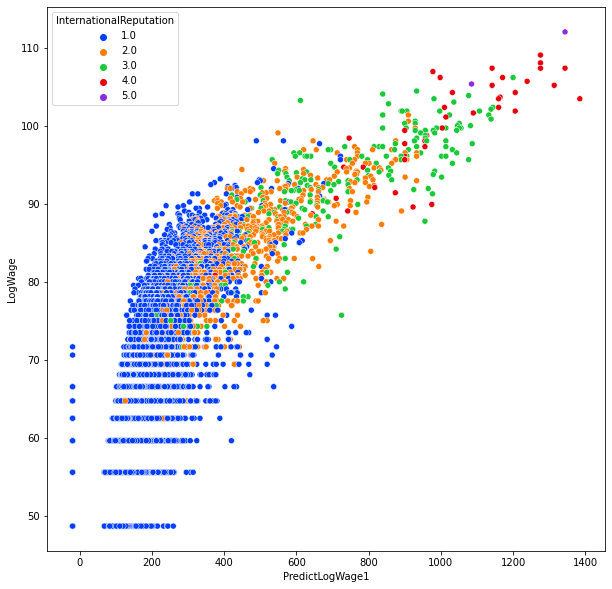

In [19]:
fig = plt.figure(figsize=(10,10))

sns.scatterplot(data=df, x='PredictLogWage1',y='LogWage',hue='InternationalReputation',palette='bright')
plt.show()

<AxesSubplot:>

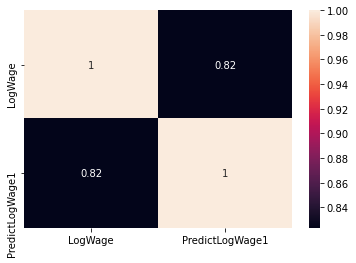

In [20]:
sns.heatmap(df[['LogWage', 'PredictLogWage1']].corr(), annot=True)

<AxesSubplot:>

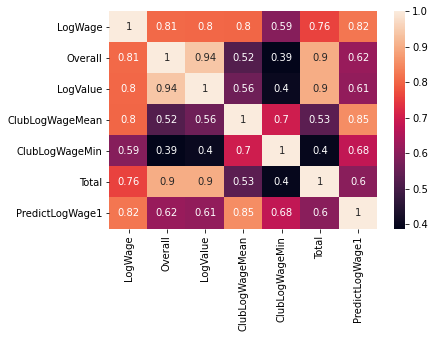

In [21]:
# 선형성이 증가했다.

sns.heatmap(df[['LogWage', 'Overall', 'LogValue', 'ClubLogWageMean', 
                'ClubLogWageMin','Total','PredictLogWage1']].corr(), annot=True)

# 하위 값들은 여전히 뭉쳐있다.

하위 값들에게선 당연히 Total과 LogValue가 낮을 것이다.

그러므로 최고 점수의 선수로부터 멀어질수록 

최고 선수를 기준으로 더 많이 빼주겟다.

- PredictLogWage1에 Total은 상위편차*5를 빼주는 것이 좋다.
- PredictLogWage1에 LogValue를 상위편차*10을 해주는 것이 좋다.

In [22]:
for i in range(df.shape[0]):
    df.PredictLogWage1[i]=df.PredictLogWage1[i]-(df.Total.max()-df.Total[i])*7 \
                            -(df.LogValue.max()-df.LogValue[i])*10

<Figure size 1440x1440 with 0 Axes>

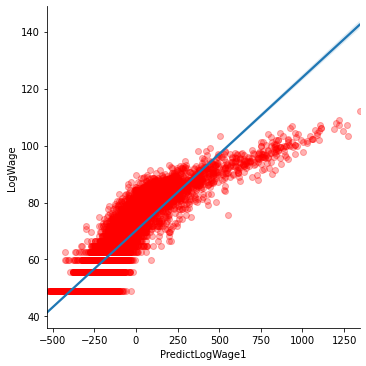

In [23]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='PredictLogWage1', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

<AxesSubplot:>

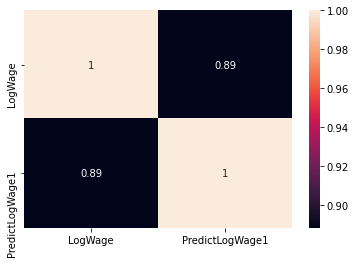

In [24]:
# 또 증가함.

sns.heatmap(df[['LogWage', 'PredictLogWage1']].corr(), annot=True)

<AxesSubplot:>

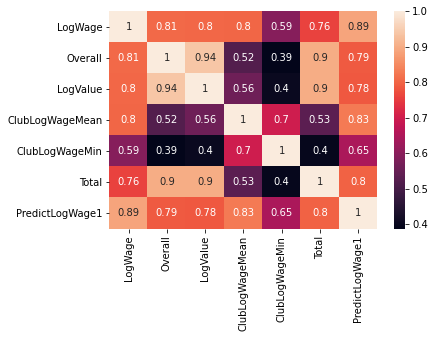

In [25]:
# 또 증가함.

sns.heatmap(df[['LogWage', 'Overall', 'LogValue', 'ClubLogWageMean', 
                'ClubLogWageMin','Total','PredictLogWage1']].corr(), annot=True)

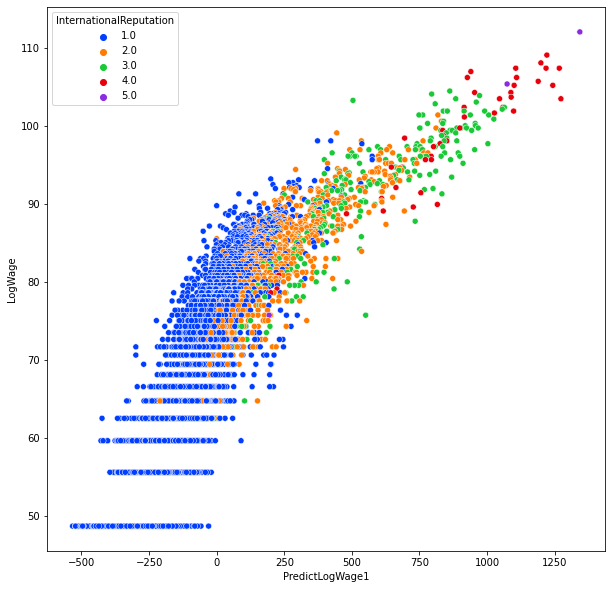

In [26]:
fig = plt.figure(figsize=(10,10))

sns.scatterplot(data=df, x='PredictLogWage1',y='LogWage',hue='InternationalReputation',palette='bright')
plt.show()

# Total을 공식에 넣어 만든 PredictTotal

In [ ]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='Total', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [ ]:
PredictTotal = pd.DataFrame(np.zeros(df.shape[0]),columns=['PredictTotal'])
df = pd.concat([df,PredictTotal], axis=1)

In [ ]:
for i in range(df.shape[0]):
    df.PredictTotal[i] = 2*((df.ClubWeight100[i]-1)/df.ClubWeight100[i])* \
    df.Total[i]+df.Total.min()

In [ ]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='PredictTotal', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [ ]:
# 엄청 늘어났다.
sns.heatmap(df[['LogWage', 'Overall', 'LogValue', 'ClubLogWageMean', 
                'Total', 'PredictTotal', 'ClubLogWageMin', 
                'PredictLogWage1']].corr(), annot=True)

In [ ]:
fig = plt.figure(figsize=(10,10))

sns.scatterplot(data=df, x='PredictTotal',y='LogWage',hue='InternationalReputation',palette='bright')
plt.show()

# Overall을 공식에 넣어 만든 PredictOverall

In [ ]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='Overall', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [ ]:
df['PredictOverall'] = df.Overall

for i in range(df.shape[0]):
    df.PredictOverall[i] = 2*((df.ClubWeight100[i]-1)/df.ClubWeight100[i])* \
    df.Overall[i]+df.Overall.min()

In [ ]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='PredictOverall', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [ ]:
# 쪼꼼 늘었다.
sns.heatmap(df[['LogWage', 'Overall', 'PredictOverall', 'LogValue', 
                'ClubLogWageMean', 'Total', 'PredictTotal', 'ClubLogWageMin', 
                'PredictLogWage1']].corr(), annot=True)

# ClubLogWageMean을 공식에 넣어 만든 PredictClubLogWageMean

In [ ]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='ClubLogWageMean', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [ ]:
df['PredictClubLogWageMean'] = df.ClubLogWageMean

for i in range(df.shape[0]):
    df.PredictClubLogWageMean[i] = 2*((df.ClubWeight100[i]-1)/df.ClubWeight100[i])* \
    df.ClubLogWageMean[i]+df.ClubLogWageMean.min()

In [ ]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='PredictClubLogWageMean', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [ ]:
# 오히려 떨어짐.
sns.heatmap(df[['LogWage', 'Overall', 'PredictOverall', 'LogValue', 
                'ClubLogWageMean', 'PredictClubLogWageMean', 'Total', 'PredictTotal',
                'ClubLogWageMin', 'PredictLogWage1']].corr(), annot=True)

# !!!PredictClubLogWageMean는 폐기!!!!

# LogValue를 공식에 넣어 만든 PredictLogValue

In [ ]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='LogValue', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [ ]:
df['PredictLogValue'] = df.LogValue

for i in range(df.shape[0]):
    df.PredictLogValue[i] = 2*((df.ClubWeight100[i]-1)/df.ClubWeight100[i])* \
    df.LogValue[i]+df.LogValue.min()

In [ ]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df, x='PredictLogValue', y='LogWage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [ ]:
# LogWage와의 선형성이 증가했다.

sns.heatmap(df[['LogWage', 'Overall', 'PredictOverall', 'LogValue', 'PredictLogValue',
                'ClubLogWageMean', 'PredictClubLogWageMean', 'Total', 'PredictTotal',
                'ClubLogWageMin', 'PredictLogWage1']].corr(), annot=True)

# 최종 변수 선정

In [ ]:
df.columns

종속변수 : 'LogWage'

이산값 컬럼 : 'Age', 'InternationalReputation', 'RealFace', 'LoanedFrom','PositionClass', 

이산값 가중치 컬럼 : 'AgeWeight', 'InternationalReputationWeight', 'RealFaceWeight',
                     'Loa
                     nedFromWeight', 'PositionClassWeight', 'PositionClass1'


연속값 컬럼 :  'Overall', 'LogValue', 'Total'



구단 컬럼 : 'ClubLogWageMean', 'ClubLogWageMedian',
            'ClubLogWageMin',  'ClubWeight100', 'ClubWeight75', 
            'ClubWeight50', 'ClubWeight25', 
       
       
공식 계산된 컬럼 : 'PredictLogWage1', 'PredictTotal', 'PredictOverall',  
                   'PredictLogValue'

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df[['LogWage', 'Age', 'AgeWeight', 'InternationalReputation', 
                'InternationalReputationWeight', 'RealFace', 'RealFaceWeight',
                'LoanedFrom', 'LoanedFromWeight', 'PositionClass',
                'PositionClassWeight', 'PositionClass1']].corr(), annot=True)

# 'AgeWeight', 'InternationalReputationWeight', 'RealFace', 
# 'LoanedFrom', 'PositionClassWeight' 선정.

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df[['LogWage', 'Overall', 'PredictOverall', 'LogValue', 'PredictLogValue', 
                'Total', 'PredictTotal', 'ClubLogWageMin', 'PredictLogWage1',
                'ClubLogWageMean',
                'ClubWeight100', 'ClubWeight75', 
                'ClubWeight50', 'ClubWeight25']].corr(), annot=True)

# 'PredictOverall', 'PredictLogValue', 'PredictTotal', 'PredictLogWage1', 
# 'ClubLogWageMean',
# 'ClubWeight100', 'ClubWeight75', ClubWeight50', 'ClubWeight25' 선정

## 컬럼 선정 결과


사용 예정 :

[가중치 컬럼들]
'AgeWeight', 'InternationalReputationWeight', 'RealFace', 
'LoanedFrom', 'PositionClassWeight'

[계산된 컬럼들]
'PredictOverall', 'PredictLogValue', 'PredictTotal', 'PredictLogWage1', 

[클럽 관련 컬럼들]
'ClubLogWageMean',
'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 'ClubWeight25'

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df[['LogWage', 'AgeWeight', 'InternationalReputationWeight', 'RealFace', 
                'LoanedFrom', 'PositionClassWeight',
                'PredictOverall', 'PredictLogValue', 'PredictTotal', 'PredictLogWage1', 
                'ClubLogWageMean',
                'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
                'ClubWeight25']].corr(), annot=True)

# 훈련데이터에서 검증 데이터, 테스트 데이터로 나눠서 평가해보자.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split


Y_target = df['LogWage']
X_data = df[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
             'ClubWeight25']]


X_train , X_test , Y_train , Y_test = train_test_split(
                        X_data , Y_target ,test_size=0.3, random_state=156)


print(X_train.shape)
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
print(X_train_poly.shape)

X_test_poly = poly.transform(X_test)

ss = StandardScaler()
ss.fit(X_train_poly)
X_train_Scaled = ss.transform(X_train_poly)
X_test_Scaled = ss.transform(X_test_poly)

print('====================')

ridge = Ridge()
ridge.fit(X_train_Scaled, Y_train)
print('Ridge train R2: ', ridge.score(X_train_Scaled, Y_train))
print('Ridge test R2:  ', ridge.score(X_test_Scaled, Y_test))

print('====================')


# 하이퍼 파라미터 튜닝

parameters = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_dclf = GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
grid_dclf.fit(X_train, Y_train)
print('Ridge GCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)


print('====================')

train_score=[]
test_score=[]

alpha_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_Scaled, Y_train)
    train_score.append(ridge.score(X_train_Scaled, Y_train))
    test_score.append(ridge.score(X_test_Scaled, Y_test))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# PredictLogWage1하나만으로 예측

In [ ]:
# ***Regressor 로 모델 비교. # 연속형데이터 예측할 수 있는 모델. 
# 예측모델임. 정량적 예측모델  비교임 (ex 국어점수로 수학점수 예측하고 막 그런거)

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor


Y_target = df['LogWage']
X_data = np.array(df['PredictLogWage1']).reshape(-1,1)


X_train , X_test , Y_train , Y_test = train_test_split(
                        X_data , Y_target ,test_size=0.3, random_state=156)



print('===============================')
KNeighbors = KNeighborsRegressor(n_neighbors=3).fit(X_train,Y_train)
print(KNeighbors)
kn_pred = KNeighbors.predict(X_test)
mse = mean_squared_error(Y_test, kn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, kn_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
Linear = LinearRegression().fit(X_train,Y_train)
print(Linear)
lr_pred = Linear.predict(X_test)
mse = mean_squared_error(Y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, lr_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))

print('===============================')
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

ss = StandardScaler()
ss.fit(X_train_poly)
X_train_Scaled = ss.transform(X_train_poly)
X_test_Scaled = ss.transform(X_test_poly)

Ridge = Ridge(alpha=0.1)
Ridge.fit(X_train_Scaled, Y_train)
print(Ridge)
rg_pred = Ridge.predict(X_test_Scaled)
mse = mean_squared_error(Y_test, rg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, rg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
RandomForest = RandomForestRegressor(n_estimators=200,criterion='mse').fit(X_train,Y_train)
print(RandomForest)
rf_pred = RandomForest.predict(X_test)
mse = mean_squared_error(Y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, rf_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
LGBM = LGBMRegressor(n_estimators=200).fit(X_train,Y_train)
print(LGBM)
lg_pred = LGBM.predict(X_test)
mse = mean_squared_error(Y_test, lg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, lg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
XGB = XGBRegressor(n_estimators=500).fit(X_train,Y_train)
print(XGB)
xg_pred = XGB.predict(X_test)
mse = mean_squared_error(Y_test, xg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, xg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))

# 실제 훈련데이터 예측

In [ ]:
# ***Regressor 로 모델 비교. # 연속형데이터 예측할 수 있는 모델. 
# 예측모델임. 정량적 예측모델  비교임 (ex 국어점수로 수학점수 예측하고 막 그런거)

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor


Y_target = df['LogWage']
X_data = df[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
             'ClubWeight25']]


X_train , X_test , Y_train , Y_test = train_test_split(
                        X_data , Y_target ,test_size=0.3, random_state=156)



print('===============================')
KNeighbors = KNeighborsRegressor(n_neighbors=3).fit(X_train,Y_train)
print(KNeighbors)
kn_pred = KNeighbors.predict(X_test)
mse = mean_squared_error(Y_test, kn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, kn_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
Linear = LinearRegression().fit(X_train,Y_train)
print(Linear)
lr_pred = Linear.predict(X_test)
mse = mean_squared_error(Y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, lr_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))

print('===============================')
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

ss = StandardScaler()
ss.fit(X_train_poly)
X_train_Scaled = ss.transform(X_train_poly)
X_test_Scaled = ss.transform(X_test_poly)

Ridge = Ridge(alpha=0.05)
Ridge.fit(X_train_Scaled, Y_train)
print(Ridge)
rg_pred = Ridge.predict(X_test_Scaled)
mse = mean_squared_error(Y_test, rg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, rg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
RandomForest = RandomForestRegressor(n_estimators=1000,criterion='mse').fit(X_train,Y_train)
print(RandomForest)
rf_pred = RandomForest.predict(X_test)
mse = mean_squared_error(Y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, rf_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
LGBM = LGBMRegressor(n_estimators=1500).fit(X_train,Y_train)
print(LGBM)
lg_pred = LGBM.predict(X_test)
mse = mean_squared_error(Y_test, lg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, lg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))


print('===============================')
XGB = XGBRegressor(n_estimators=2500).fit(X_train,Y_train)
print(XGB)
xg_pred = XGB.predict(X_test)
mse = mean_squared_error(Y_test, xg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, xg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))

RandomForestRegressor(n_estimators=1000)
로그 변환된 MSE:   7.237
로그 변환된 RMSE:  2.69
결정계수 R2:       0.951

LGBMRegressor(n_estimators=1500)
로그 변환된 MSE:   5.146
로그 변환된 RMSE:  2.268
결정계수 R2:       0.965

[15:25:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(n_estimators=2500)
로그 변환된 MSE:   5.01
로그 변환된 RMSE:  2.238
결정계수 R2:       0.966

In [ ]:
# 변수 중요도 시각화.

DecisionTree = DecisionTreeRegressor(max_depth=1000)
DecisionTree.fit(X_train, Y_train)

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=4)
importance_df = pd.DataFrame()

models = [DecisionTree, RandomForest, LGBM, XGB]

for i_num, model in enumerate(models):
    feature_series = pd.Series(data=model.feature_importances_,index=X_train.columns)
    colname = str(model)
    importance_df[colname] = feature_series
    feature_series = feature_series.sort_values(ascending=False)
    axs[i_num].set_title(colname)
    sns.barplot(x=feature_series.values, y=feature_series.index, ax=axs[i_num])

- RMSE와 변수 중요도 확인 결과 신뢰할 수 있는 모델이라고 판단.

# 최종 결정 컬럼

- Y_target = df['LogWage']

- X_data = df[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean', 'ClubLogWageMedian',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
             'ClubWeight25']]

# 여기서 결정계수는 전혀 의미가 없다.

# 테스트 데이터에서의 결정계수가 중요하다.

In [ ]:
df

# 저장

In [ ]:
df.to_pickle('./dataset/나혼자FIFA_훈련데이터최종.pkl')